In [7]:
import pandas as pd
train = pd.read_csv(r"C:\Users\Han\Desktop\dataset\train_tokens.csv")
train_token = train.lower
##This part is altered when the tokens change

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
X_train_counts = CountVectorizer(lowercase = False).fit_transform(train_token)
##lowercase = False keeps the original form of the tokens, do not change

In [9]:

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
##Give weight values to the tokens

In [11]:
X = X_train_tfidf.toarray()
y = train.rating
##Converts it to a readable form for train_test_split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.80, random_state=123456)
##Random state keeps the same split everytime

In [13]:
train_acc =[]
test_acc =[]
train_loss =[]
test_loss =[]
values = [i for i in range(1, 21)]

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
for i in values:
    lr = LogisticRegression(max_iter=i)
    lr.fit(X_train,y_train)
    # evaluate on the train dataset
    train_pr = lr.predict(X_train) 
    train_accuracy = accuracy_score(y_train, train_pr)
    train_acc.append(train_accuracy)
    # evaluate on the test dataset
    test_pr = lr.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pr)
    test_acc.append(test_accuracy)
    #calculate loss   
    train_l = log_loss(y_train, train_pr)
    test_l = log_loss(y_test, test_pr)
    train_loss.append(train_l)
    test_loss.append(test_l)

C:\Users\Han\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Han\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

In [15]:
print("Lowercase: Accuracy\n")
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_acc[i-1], test_acc[i-1]))

Lowercase: Accuracy

Iteration: 1, train: 0.503, test: 0.493
Iteration: 2, train: 0.681, test: 0.671
Iteration: 3, train: 0.787, test: 0.792
Iteration: 4, train: 0.789, test: 0.795
Iteration: 5, train: 0.794, test: 0.801
Iteration: 6, train: 0.811, test: 0.816
Iteration: 7, train: 0.880, test: 0.869
Iteration: 8, train: 0.889, test: 0.875
Iteration: 9, train: 0.894, test: 0.876
Iteration: 10, train: 0.900, test: 0.879
Iteration: 11, train: 0.908, test: 0.880
Iteration: 12, train: 0.910, test: 0.883
Iteration: 13, train: 0.913, test: 0.881
Iteration: 14, train: 0.926, test: 0.890
Iteration: 15, train: 0.924, test: 0.890
Iteration: 16, train: 0.923, test: 0.891
Iteration: 17, train: 0.923, test: 0.890
Iteration: 18, train: 0.925, test: 0.891
Iteration: 19, train: 0.929, test: 0.892
Iteration: 20, train: 0.931, test: 0.891


In [16]:
print("Lowercase: Loss\n")
for i in values:
    print('Iteration: %d, train: %.3f, test: %.3f' % (i, train_loss[i-1], test_loss[i-1]))

Lowercase: Loss

Iteration: 1, train: 17.164, test: 17.494
Iteration: 2, train: 11.024, test: 11.346
Iteration: 3, train: 7.361, test: 7.176
Iteration: 4, train: 7.273, test: 7.072
Iteration: 5, train: 7.098, test: 6.873
Iteration: 6, train: 6.517, test: 6.364
Iteration: 7, train: 4.147, test: 4.533
Iteration: 8, train: 3.847, test: 4.309
Iteration: 9, train: 3.670, test: 4.283
Iteration: 10, train: 3.452, test: 4.162
Iteration: 11, train: 3.167, test: 4.136
Iteration: 12, train: 3.124, test: 4.032
Iteration: 13, train: 3.014, test: 4.110
Iteration: 14, train: 2.552, test: 3.799
Iteration: 15, train: 2.629, test: 3.808
Iteration: 16, train: 2.649, test: 3.773
Iteration: 17, train: 2.647, test: 3.799
Iteration: 18, train: 2.590, test: 3.756
Iteration: 19, train: 2.450, test: 3.730
Iteration: 20, train: 2.388, test: 3.756


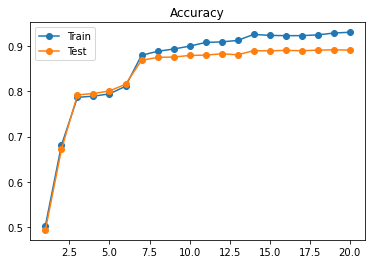

In [17]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Accuracy")
pyplot.plot(values, train_acc, '-o', label='Train')
pyplot.plot(values, test_acc, '-o', label='Test')
pyplot.legend()
pyplot.savefig("lower_accuracy.png",dpi=1200)
pyplot.show()

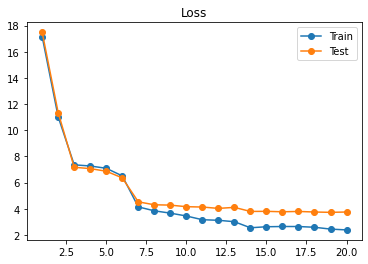

In [18]:
from matplotlib import pyplot
# plot of train and test scores vs iteration
pyplot.title("Loss")
pyplot.plot(values, train_loss, '-o', label='Train')
pyplot.plot(values, test_loss, '-o', label='Test')
pyplot.legend()
pyplot.savefig("lower_loss.png",dpi=1200)
pyplot.show()